### Given Movie Dataset, make a visualisation:
- Length of movie titles on x axis
- Frequency counts on y axis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

In [2]:
#Reading the data
df = pd.read_csv("movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [7]:
movieNames = df[["movie_title"]]
print(movieNames)

                                            movie_title
0                                               Avatar 
1             Pirates of the Caribbean: At World's End 
2                                              Spectre 
3                                The Dark Knight Rises 
4     Star Wars: Episode VII - The Force Awakens    ...
...                                                 ...
5038                           Signed Sealed Delivered 
5039                         The Following             
5040                              A Plague So Pleasant 
5041                                  Shanghai Calling 
5042                                 My Date with Drew 

[5043 rows x 1 columns]


In [8]:
movieValues = movieNames.values
movieValues

array([['Avatar\xa0'],
       ["Pirates of the Caribbean: At World's End\xa0"],
       ['Spectre\xa0'],
       ...,
       ['A Plague So Pleasant\xa0'],
       ['Shanghai Calling\xa0'],
       ['My Date with Drew\xa0']], dtype=object)

In [10]:
movieLengths = list(map(lambda x : len(x[0]), movieValues))
print(movieLengths)

[7, 41, 8, 22, 55, 12, 13, 8, 24, 39, 35, 17, 18, 43, 16, 13, 41, 13, 44, 15, 42, 23, 11, 36, 19, 10, 8, 27, 11, 15, 8, 13, 11, 20, 22, 20, 36, 32, 26, 25, 13, 7, 14, 12, 21, 10, 12, 27, 24, 22, 17, 36, 12, 31, 51, 18, 6, 17, 7, 12, 5, 18, 18, 21, 63, 18, 16, 3, 20, 9, 5, 15, 38, 14, 14, 17, 11, 28, 11, 16, 11, 28, 11, 31, 11, 9, 36, 20, 13, 11, 15, 18, 29, 25, 35, 24, 13, 10, 20, 34, 25, 36, 19, 38, 26, 9, 32, 16, 9, 19, 57, 13, 13, 10, 42, 36, 8, 12, 34, 12, 14, 28, 47, 25, 23, 7, 20, 21, 19, 16, 5, 5, 8, 20, 13, 35, 12, 21, 10, 16, 19, 24, 17, 16, 13, 4, 22, 5, 35, 16, 13, 11, 16, 8, 16, 37, 22, 23, 17, 23, 10, 11, 27, 14, 8, 9, 16, 5, 22, 7, 34, 35, 24, 48, 42, 13, 20, 23, 8, 13, 6, 6, 23, 21, 14, 8, 32, 42, 5, 18, 12, 14, 5, 5, 25, 41, 10, 12, 9, 46, 40, 9, 38, 9, 20, 55, 45, 38, 18, 6, 8, 10, 35, 20, 13, 17, 18, 15, 31, 23, 23, 18, 39, 11, 12, 13, 32, 11, 16, 8, 26, 8, 12, 16, 15, 9, 45, 45, 15, 14, 42, 11, 29, 12, 27, 29, 8, 13, 49, 15, 20, 12, 20, 12, 15, 17, 10, 12, 19, 17, 23

In [11]:
from collections import Counter

counter = Counter(movieLengths)
print(counter)

Counter({12: 330, 11: 328, 13: 306, 10: 294, 15: 284, 14: 274, 9: 267, 16: 264, 17: 239, 8: 226, 18: 219, 19: 213, 20: 176, 6: 139, 7: 138, 22: 138, 21: 138, 23: 109, 5: 91, 24: 85, 25: 82, 26: 74, 27: 69, 29: 65, 28: 51, 31: 47, 32: 43, 30: 36, 4: 35, 34: 31, 35: 30, 38: 24, 36: 21, 33: 21, 37: 18, 41: 17, 42: 14, 40: 14, 39: 13, 44: 9, 43: 8, 3: 8, 46: 7, 51: 5, 2: 5, 47: 4, 48: 4, 45: 4, 49: 4, 55: 3, 50: 3, 59: 2, 54: 2, 53: 2, 63: 1, 57: 1, 60: 1, 56: 1, 84: 1, 87: 1, 72: 1, 69: 1, 80: 1, 67: 1})


In [16]:
y = list(counter.values())
print(y)

[138, 17, 226, 138, 3, 330, 306, 85, 13, 30, 239, 219, 8, 264, 9, 284, 14, 109, 328, 21, 213, 294, 69, 176, 43, 74, 82, 274, 138, 47, 5, 139, 91, 1, 8, 267, 24, 51, 65, 31, 1, 4, 35, 18, 4, 7, 14, 4, 4, 3, 36, 21, 5, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1]


In [18]:
x = list(counter.keys())
print(x)

[7, 41, 8, 22, 55, 12, 13, 24, 39, 35, 17, 18, 43, 16, 44, 15, 42, 23, 11, 36, 19, 10, 27, 20, 32, 26, 25, 14, 21, 31, 51, 6, 5, 63, 3, 9, 38, 28, 29, 34, 57, 47, 4, 37, 48, 46, 40, 45, 49, 50, 30, 33, 2, 59, 60, 56, 84, 54, 87, 53, 72, 69, 80, 67]


### Scatter Plot visualisation

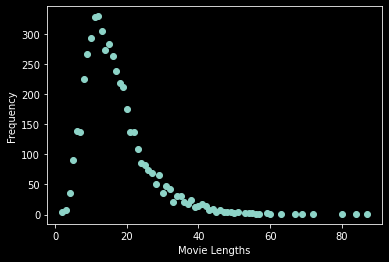

In [19]:
plt.scatter(x,y)

plt.xlabel("Movie Lengths")
plt.ylabel("Frequency")

plt.show()

### Histogram Visualisation

(array([35.,  6.,  5.,  1.,  4.,  1.,  3.,  2.,  4.,  3.]),
 array([  1. ,  33.9,  66.8,  99.7, 132.6, 165.5, 198.4, 231.3, 264.2,
        297.1, 330. ]),
 <BarContainer object of 10 artists>)

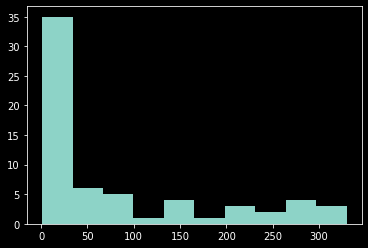

In [22]:
plt.hist(y, label=x)